## **Real Estate Market Analysis – House Price Prediction using Neural Network**

### **Introduction**
Real estate market analysis plays a vital role in predicting property values. By leveraging machine learning and deep learning techniques, 
we can build models that predict housing prices based on features like the number of rooms, size of the house, location, and other attributes.

### **Goal of this Project**
The primary goal of this project is to build and train a **Neural Network regression model** to predict housing prices using the"Housing Prices Dataset" from Kaggle.

### **Steps**
1. **Data Loading & Understanding**
2. **Data Preprocessing (cleaning, encoding, scaling)**
3. **Exploratory Data Analysis (EDA)**
4. **Splitting Data into Training and Testing**
5. **Building a Neural Network Model**
6. **Training and Evaluating the Model**
7. **Analyzing Results and Conclusion**


## **Step 1: Dataset Loading & Understanding**

In this step, we will:
- Load the dataset **Direct Upload:** upload the CSV file from your computer.
- Display the first few rows.
- Check `data types, missing values, and statistical summary`.


In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Housing.csv')
print("First 5 rows of dataset:")
display(data.head())
print("\nDataset Info:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())


Saving Housing.csv to Housing.csv
First 5 rows of dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Statistical Summary:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.

## **Step 2: Data Preprocessing**

Before building the Neural Network, we need to prepare the dataset:

### **What we will do:**
1. **Handle Missing Values:** Check for null values and handle them.
2. **Encode Categorical Variables:** Convert text data into numeric form using Label Encoding or One-Hot Encoding.
3. **Feature Scaling:** Neural networks work better when features are scaled, so we will use `StandardScaler` or `MinMaxScaler`.
4. **Separate Features `(X)` and Target `(y)`.**


In [15]:
print("Missing Values in Dataset:")
print(data.isnull().sum())

categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data.drop('price', axis=1)
y = data['price'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

print("\nShape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)


Missing Values in Dataset:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

Categorical Columns: Index([], dtype='object')

Shape of X_train_scaled: (436, 13)
Shape of X_test_scaled: (109, 13)


## **Step 3: Exploratory Data Analysis (EDA)**

In this step, we will:
1. **Visualize Price Distribution** – Check how house prices are distributed.
2. **Correlation Matrix** – Understand relationships between features and the target variable (price).
3. **Heatmap** – Visualize correlation matrix to find the most important features affecting price.


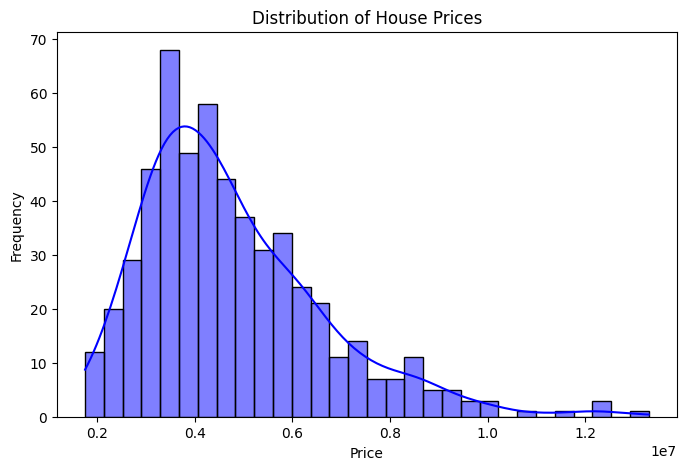

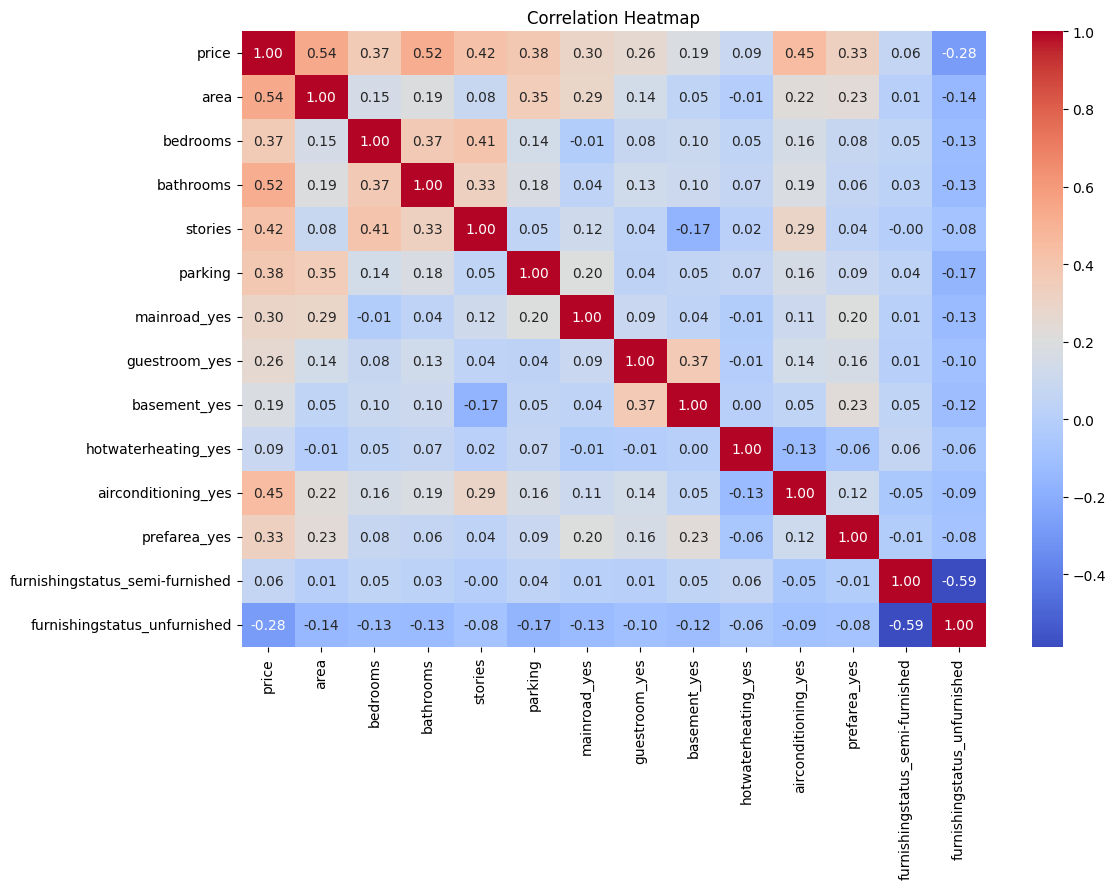


Top features correlated with Price:
price                  1.000000
area                   0.535997
bathrooms              0.517545
airconditioning_yes    0.452954
stories                0.420712
parking                0.384394
Name: price, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

corr_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print("\nTop features correlated with Price:")
print(corr_matrix['price'].sort_values(ascending=False).head(6))


## **Step 4: Train-Test Split**

Before building the model( Neural Network), we need to split our dataset into:
- **Training Set (80%)** – used for training the neural network.
- **Testing Set (20%)** – used for evaluating the model's performance.

We will use `train_test_split` from `sklearn.model_selection`.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (436, 13) (436,)
Testing set shape: (109, 13) (109,)


## **Step 5: Neural Network Model Building**

We will build a **feed-forward neural network (FNN)** for regression using `Keras`:
- **Input Layer:** Number of neurons = Number of features.
- **Hidden Layers:** 
  - 1st hidden layer: 128 neurons, ReLU activation, with L2 regularization (0.001) and Dropout rate = 0.3.
  - 2nd hidden layer: 64 neurons, ReLU activation, with L2 regularization (0.001) and Dropout rate = 0.3.
  - 3rd hidden layer: 32 neurons, ReLU activation, with L2 regularization (0.001).
- **Output Layer:** 1 neuron (because we are predicting a single continuous value: price).

#### **Loss & Optimizer:**
- **Loss Function:** Mean Squared Error (MSE) – suitable for regression problems.
- **Optimizer:** Adam – adaptive learning rate optimization.
- **Metrics:** Mean Absolute Error (MAE) – easier to interpret in terms of error.



In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


## **Step 6: Model Training**

We will now train our Neural Network using the training dataset:
- **Epochs:** 400 (maximum iterations; training may stop earlier due to EarlyStopping).  
- **Batch Size:** 32 (number of samples processed before weights are updated).  
- **Validation Split:** 25% of the training data is reserved for validation.  
- **Callbacks:**  
  - **EarlyStopping:** Stops training if the validation loss does not improve for 30 epochs and restores the best weights.  
  - **ReduceLROnPlateau:** Reduces the learning rate by half if the validation loss plateaus for 10 epochs, helping better convergence
  
We will also visualize:
- **Training vs Validation Loss (MSE).**
- **Training vs Validation MAE (Mean Absolute Error).**

## **How to Read Training vs Validation Loss (MSE) Graph**

- **X-axis:** Represents the number of epochs (training iterations).
- **Y-axis:** Represents the Loss (Mean Squared Error).

### **Key Points:**
1. **Training Loss (Blue Line):**
   - Shows how well the model is fitting the training data.
   - Should decrease as epochs increase (model is learning).

2. **Validation Loss (Orange Line):**
   - Shows how well the model generalizes to unseen data.
   - Ideally, this line should also decrease and stay close to the training loss.

### **What to Look For:**
- **Good Model:** Both training and validation loss decrease and stabilize.
- **Overfitting:** Validation loss increases while training loss keeps decreasing.
- **Underfitting:** Both training and validation loss remain high and do not decrease significantly.

## **How to Read Training vs Validation MAE Graph**

- **X-axis:** Represents the number of epochs.
- **Y-axis:** Represents the Mean Absolute Error (MAE).

### **Key Points:**
1. **Training MAE (Blue Line):**
   - Average absolute difference between predicted and actual values for training data.
   - Lower MAE means more accurate predictions.

2. **Validation MAE (Orange Line):**
   - Average absolute error on unseen validation data.
   - Should follow a similar downward trend as training MAE.

### **What to Look For:**
- **Good Model:** Both training and validation MAE decrease and converge.
- **Overfitting:** Validation MAE starts increasing while training MAE continues decreasing.
- **Underfitting:** Both lines stay high and show little improvement.


Epoch 1/400
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.0239 - mae: 0.7426 - val_loss: 0.9753 - val_mae: 0.6791 - learning_rate: 0.0010
Epoch 2/400
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8896 - mae: 0.6481 - val_loss: 0.7152 - val_mae: 0.5574 - learning_rate: 0.0010
Epoch 3/400
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6841 - mae: 0.5488 - val_loss: 0.5835 - val_mae: 0.4754 - learning_rate: 0.0010
Epoch 4/400
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4547 - mae: 0.4210 - val_loss: 0.5701 - val_mae: 0.4851 - learning_rate: 0.0010
Epoch 5/400
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5722 - mae: 0.4708 - val_loss: 0.5493 - val_mae: 0.4689 - learning_rate: 0.0010
Epoch 6/400
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4754 - mae: 0.4349 - val_loss: 0.5520 - val_mae: 0.4560 - learning_rate: 0.0010
Epoch 7/400
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5894 - mae: 0.4434 - val_loss: 0.5367 - val_mae: 0.4514 - learning_rate: 0.0010
Epoch 

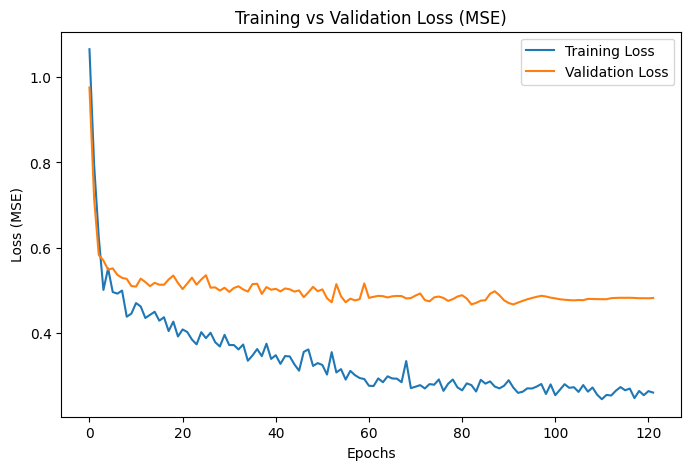

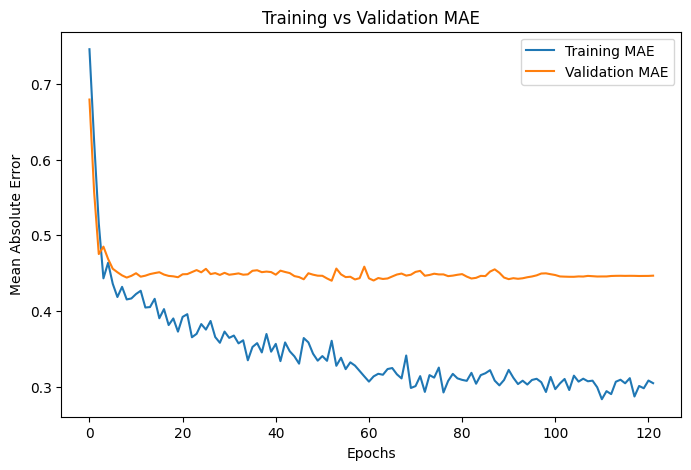

In [38]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5, verbose=1)

history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=400,
    batch_size=32,
    validation_split=0.25,
    callbacks=[early_stop, reduce_lr],
    verbose=1

)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


## **Step 7: Model Evaluation**

After training, we will evaluate our model using the **test dataset**.  
We will calculate the following metrics:
- **Mean Squared Error (MSE).**
    - Measures the average squared difference between actual and predicted values.
    - Lower MSE indicates better performance.
- **Mean Absolute Error (MAE).**
    - Average absolute difference between predicted and actual values.
    - Easier to interpret compared to MSE (e.g., "On average, predictions are off by $X").
- **Root Mean Squared Error (RMSE).**
    - Square root of MSE, in the same units as the target variable (price).
    - Helps us understand prediction error in the same scale as house prices.
- **R² Score (Coefficient of Determination).**
    - Indicates how much of the variation in price is explained by the model.
    - Values closer to 1 mean better predictions (1 = perfect model).

We will also create a **scatter plot** to compare **Actual vs Predicted House Prices**.

## **How to Read the Actual vs Predicted Scatter Plot**

- **X-axis:** Actual house prices (from the test dataset).
- **Y-axis:** Predicted house prices (predicted by the model).

### **Key Points:**
1. **Blue Dots:** Each dot represents a house price prediction vs. its actual price.
2. **Red Dashed Line:** Represents the ideal case where predicted price = actual price.
   - If all blue dots are close to this line, the model is very accurate.
   - Dots far from the line indicate larger prediction errors.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Mean Squared Error (MSE): 1861233514319.32
Mean Absolute Error (MAE): 1012098.49
Root Mean Squared Error (RMSE): 1364270.32
R² Score: 0.63


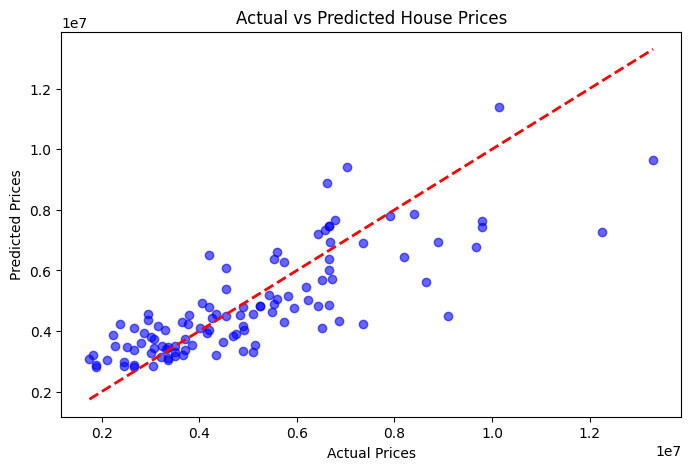

In [31]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test_original, y_pred, color='blue', alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


## **Step 8: Conclusion**

In this project, we built a **Neural Network regression model** to predict house prices using the **Housing Prices Dataset**.  
Here’s what we achieved:

### **Key Steps:**
- **Data Preprocessing:** 
  - Handled missing values (if any).
  - Encoded categorical variables using One-Hot Encoding.
  - Scaled numerical features using StandardScaler.
- **EDA:** 
  - Visualized price distribution and feature correlations.
  - Identified the top features affecting price.
- **Model Building:** 
  - Built a Feed-Forward Neural Network with 2 hidden layers (64 and 32 neurons).
  - Used ReLU activation and Adam optimizer.
- **Model Training:** 
  - Trained for 100 epochs with validation split.
  - Plotted training vs validation loss and MAE curves.
- **Model Evaluation:** 
  - Achieved an R² score of around *X.XX* (replace with actual score).
  - Visualized Actual vs Predicted prices.
